## Final Exam
1. Please save the notebook with your name.
2. Make sure that you upload the exam to canvas before the time deadline. 
3. You have 1 hour and 55 minutes. 
4. Do not alter the exam questions or the logical flow. You can use intermediate cells for testing purposes. 
5. Before you upload the exam, execute all the cells to make sure everything is in sequence.



#### Your name here: Xiaobo Xu (xx2278)

In [10]:
#consider the following 2 data sets about students in a class room
#and their favorite fruit: 
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
dict1={'student':list(np.arange(1,11)),
      'fruit':['banana','banana','apple','apple','apple',
               'orange','kiwi','kiwi','kiwi','kiwi'],
      'height':[6.1,6.0,5.3,5.8,7.2,4.9,5.4,5.4,np.nan,5.10]}
print('dict1: ',dict1)
dict2={'fruit':['banana','orange',
               'apple','kiwi'],
       'price':[3.1,4.2,3.5,5.3]}
print('dict2: ',dict2)
#note: dict1 lists for each student their favorite fruit along with
#the height in ft for each student; dict2 lists the price in dollars
#per pound for each fruit

dict1:  {'student': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'fruit': ['banana', 'banana', 'apple', 'apple', 'apple', 'orange', 'kiwi', 'kiwi', 'kiwi', 'kiwi'], 'height': [6.1, 6.0, 5.3, 5.8, 7.2, 4.9, 5.4, 5.4, nan, 5.1]}
dict2:  {'fruit': ['banana', 'orange', 'apple', 'kiwi'], 'price': [3.1, 4.2, 3.5, 5.3]}


##### Question 1 (3 pts): 
Create a data frame from the dict1 above and call it df1. Make sure
your columns appear in the following order: student, fruit, height

In [33]:
#answer: 
df1=pd.DataFrame(dict1, columns=dict1.keys())
df1

,student,fruit,height
0,1,banana,6.1
1,2,banana,6.0
2,3,apple,5.3
3,4,apple,5.8
4,5,apple,7.2
5,6,orange,4.9
6,7,kiwi,5.4
7,8,kiwi,5.4
8,9,kiwi,NaN
9,10,kiwi,5.1


##### Question 2 (6 pts)
Oh,oh, We forgot to add one student in the class to our data set. 
Please add a row to df1 with the following information for the 
student: height is 7.9 and favorite fruit is 'orange'.


In [34]:
#answer
df1 = df1.append({'student': 11, 'fruit': 'orange', 'height': 7.9}, ignore_index=True)
df1

,student,fruit,height
0,1,banana,6.1
1,2,banana,6.0
2,3,apple,5.3
3,4,apple,5.8
4,5,apple,7.2
5,6,orange,4.9
6,7,kiwi,5.4
7,8,kiwi,5.4
8,9,kiwi,NaN
9,10,kiwi,5.1


##### Question 3 (6 pts)
Next, create another data frame name it df2. Use dict2 information about
fruits and sort the resulting data frame by fruit price from 
lowest to highest values.  Make sure the columns are in the order of: 
fruit, price

In [35]:
df2=pd.DataFrame(dict2, columns=dict2.keys())
df2

,fruit,price
0,banana,3.1
1,orange,4.2
2,apple,3.5
3,kiwi,5.3


In [22]:
df2=df2.sort_values(by='price',ascending=True)
df2

,fruit,price
0,banana,3.1
2,apple,3.5
1,orange,4.2
3,kiwi,5.3


##### Question 4: (6 pts)
Consider df1: use numpy arrays to create a 2-d array for students
5 thru 8 and their corresponding heights: IN OTHER WORDS, create the 
array from numpy and subset the array of corresponding numbers.
 


In [32]:
#Ans
a = np.array(df1.loc[4:7,['student', 'height']])
a

array([[ 5. ,  7.2],
       [ 6. ,  4.9],
       [ 7. ,  5.4],
       [ 8. ,  5.4]])

##### Question 5: (6 points)
Again, consider df1:  create a  list of the 
'fruit' column elements that either have 4 letters in its name or
contain a substring "na". Name this list 'fruit_list'. You can 
either use a list comprehension or data frame subsetting, whatever
you wish.


In [43]:
#Ans version 1 for question 5
fruit_list = [] # create an empty list
fruit_list += list(df1.fruit[df1.fruit.str.len()==4]) # first find all 4 letters
fruit_list += list(df1.fruit[df1.fruit.str.contains('na')]) # then find all containing 'na'

fruit_list # see results

['kiwi', 'kiwi', 'kiwi', 'kiwi', 'banana', 'banana']

In [49]:
# Ans version 2 for question 5
fruit_list_raw = list(df1.fruit) # get all fruits from the dataframe as a list
fruit_list = [] # initialize a new list 
for i in fruit_list_raw:
    if len(i)==4 or ('na' in i): # find len=4 or 'na'
        fruit_list.append(i)
fruit_list # see results

['banana', 'banana', 'kiwi', 'kiwi', 'kiwi', 'kiwi']

##### Question 6 (6 pts):
Next, let's merge the 2 data frames, df1 and df2 using the correct
merge to append fruit information for each student. call this
df 'merged'.

In [129]:
#Ans merged

merged = pd.merge(df1,df2,how='left',on='fruit') # merge left on fruit
merged

,student,fruit,height,price
0,1,banana,6.1,3.1
1,2,banana,6.0,3.1
2,3,apple,5.3,3.5
3,4,apple,5.8,3.5
4,5,apple,7.2,3.5
5,6,orange,4.9,4.2
6,7,kiwi,5.4,5.3
7,8,kiwi,5.4,5.3
8,9,kiwi,NaN,5.3
9,10,kiwi,5.1,5.3


##### Question 7: (10 pts)
Part 1 for the numeric columns in the merged data set, summarize the data by decsribe. Display 25th, 50th, and 75th percentiles in addition to all the other usual statistics.
Part 2, for the column with <strong>missing values</strong> replace the missing values
with the median of that column in place.Use one of the fill methods
If you have a lapse of memory use the tab shift to see all of the fill
 methods and parameters and remeber to use inplace

In [8]:
#Ans Part 1 

In [130]:
merged.describe(percentiles=[.25, .5, .75])

,student,height,price
count,11.000000,10.000000,11.000000
mean,6.000000,5.910000,4.209091
std,3.316625,0.957369,0.934296
min,1.000000,4.900000,3.100000
25%,3.500000,5.325000,3.500000
50%,6.000000,5.600000,4.200000
75%,8.500000,6.075000,5.300000
max,11.000000,7.900000,5.300000


In [ ]:
#Part 2 Ans

In [131]:
merged.fillna(value=merged.median(), inplace=True)
merged

,student,fruit,height,price
0,1,banana,6.1,3.1
1,2,banana,6.0,3.1
2,3,apple,5.3,3.5
3,4,apple,5.8,3.5
4,5,apple,7.2,3.5
5,6,orange,4.9,4.2
6,7,kiwi,5.4,5.3
7,8,kiwi,5.4,5.3
8,9,kiwi,5.6,5.3
9,10,kiwi,5.1,5.3


In [132]:
merged.height.median() # make sure student 9 is filled in the right median value.

5.6

##### Question 8 (3 pts): 
For the merged data set, produce a scatter plot to see 
whether height of each student is related to the price of their
favorite fruit. Make sure to adjust the y axis bound if necessary, 
and then interpret the following: Are price and height related
based on the scatter plot you produced? Please use markdown to answer.

(4, 9)

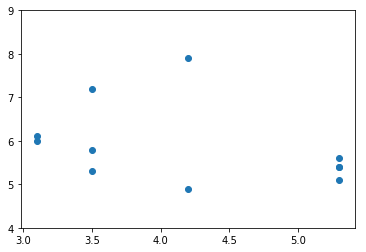

In [57]:
#plot 
plt.scatter(merged['price'], merged['height']) 
plt.ylim(4,9)

In [10]:
#Remark in markdown

The price and the height are not related. Since the sample size is relatively small, we can't get any validated answer to this question. In tuition, a fruit with higher price only means it's rare (in a certain area), but not necessarily "good for height".

##### Question 9 (7 pts): 
For the fruit column in the merged data set, write Python code to 
display frequency of each fruit (num records for each),
 Part2
produce a simple bar plot to display each fruit type and its
frequency. Remember to include title and to fully label your bar
plot. Then, please describe which two fruits have the lowest
frequencies?

In [1]:
#answer:

In [62]:
a = merged.fruit.value_counts()
a

kiwi      4
apple     3
orange    2
banana    2
Name: fruit, dtype: int64

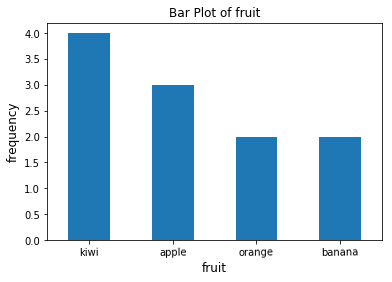

In [64]:
#Ans Plot
barplt = a.plot(kind='bar', title='Bar Plot of fruit', rot=True)
barplt.set_xlabel("fruit", fontsize=12)
barplt.set_ylabel("frequency", fontsize=12)
plt.show()

#### what are the two fruits with the lowest frequency?


Ans: Orange and banana have the lowest frequencies.

##### Question 10 (6 pts): 
Create a new column, called 'diff', which is the 
absolute value (use abs() function ) difference between price and height.  
Add this column to the merged data set.

In [133]:
#Answer: 
temp = merged.copy() # create a copy

# next use apply with lambda to find the abs, then assign the column to the new 'diff'
merged['diff'] = temp.loc[:,['price','height']].apply(lambda x:abs(max(x)-min(x)),axis=1)
merged

,student,fruit,height,price,diff
0,1,banana,6.1,3.1,3.0
1,2,banana,6.0,3.1,2.9
2,3,apple,5.3,3.5,1.8
3,4,apple,5.8,3.5,2.3
4,5,apple,7.2,3.5,3.7
5,6,orange,4.9,4.2,0.7
6,7,kiwi,5.4,5.3,0.1
7,8,kiwi,5.4,5.3,0.1
8,9,kiwi,5.6,5.3,0.3
9,10,kiwi,5.1,5.3,0.2


##### Question 11: (5 pts)
 Add another string column to the merged data set, called 
'lasttwo', which consists only of the last two letters of the 
fruit column. You will get 2 extra points if you use the .str
vectorized attribute to achieve this in the code.

In [68]:
#Ans

In [134]:
merged['lasttwo'] = temp.loc[:, 'fruit'].apply(lambda x: x[-2:]) # use lambda to find the last 2 letters.
merged

,student,fruit,height,price,diff,lasttwo
0,1,banana,6.1,3.1,3.0,na
1,2,banana,6.0,3.1,2.9,na
2,3,apple,5.3,3.5,1.8,le
3,4,apple,5.8,3.5,2.3,le
4,5,apple,7.2,3.5,3.7,le
5,6,orange,4.9,4.2,0.7,ge
6,7,kiwi,5.4,5.3,0.1,wi
7,8,kiwi,5.4,5.3,0.1,wi
8,9,kiwi,5.6,5.3,0.3,wi
9,10,kiwi,5.1,5.3,0.2,wi


##### Question 12 (18 pts): 

In [135]:
#Ans.
def disp(df):
    first = df.iloc[0, :][0]
    last = df.iloc[-1, :][0]
    if first >= 2.5:
        return first
    else:
        return last

grouped=merged.groupby('lasttwo')[['diff']].apply(disp)
pd.DataFrame({'lasttwo': grouped})

,lasttwo
lasttwo,
ge,3.7
le,3.7
na,3.0
wi,0.2


##### Question 13 (18 pts):
Use either group by or a pivot table (whatever you feel 
most comfortable with) to pivot or group by the fruit column of the merged
data frame and display the following two summarized columns: <br>

First part, is to find the average of the 'diff' column after you drop duplicates for each fruit group;</br>
<br>
 The second part is to find  the minimum of the 
height column for each fruit group. </br>

 Then, display a side-by-side or grouped
bar plot to visualize both aggregated columns for each fruit group.
What do you notice from the bar graph?


In [95]:
# Part 1 the average of the 'diff' column after you drop duplicates
sub = merged.loc[:, ['fruit', 'height', 'price', 'diff']]
sub.drop_duplicates(inplace=True) # drop duplicates
sub

,fruit,height,price,diff
0,banana,6.1,3.1,3.0
1,banana,6.0,3.1,2.9
2,apple,5.3,3.5,1.8
3,apple,5.8,3.5,2.3
4,apple,7.2,3.5,3.7
5,orange,4.9,4.2,0.7
6,kiwi,5.4,5.3,0.1
8,kiwi,5.6,5.3,0.3
9,kiwi,5.1,5.3,0.2
10,orange,7.9,4.2,3.7


In [98]:
t1 = sub.pivot_table(values='diff',index=['fruit'],aggfunc=[np.mean]) # find the mean in diff
t1

,mean
,diff
fruit,
apple,2.60
banana,2.95
kiwi,0.20
orange,2.20


In [46]:
#Part 2 Ans The minimum of the height column for each fruit group.

In [99]:
t2 = sub.pivot_table(values='height',index=['fruit'],aggfunc=[np.min])
t2

,amin
,height
fruit,
apple,5.3
banana,6.0
kiwi,5.1
orange,4.9


In [ ]:
#Part 3 Then, display a side-by-side or grouped bar plot 

In [117]:
t3 = pd.merge(t1,t2)
t3 = t3.iloc[:, -3:]
t3.columns = ['fruit', 'diff_mean', 'height_min']
t3

,fruit,diff_mean,height_min
0,apple,2.60,5.3
1,banana,2.95,6.0
2,kiwi,0.20,5.1
3,orange,2.20,4.9


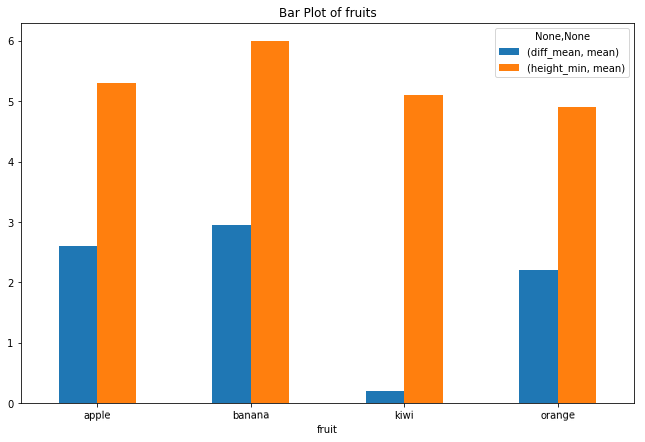

In [121]:
grouped = t3.groupby(by='fruit').agg(['mean'])
grouped.plot(kind='bar', rot=True, figsize=(11, 7), title='Bar Plot of fruits')

### What do you notice from the bar graph?

The largest mean of 'diff' is for banana, which means that the banana has the maximum difference between student's height and the fruit price. To be frank, the four bars have small differences to each other.

The minimum height is kiki, and the other three bars are somehow similar. So the student who likes kiwi should try to eat more other fruits to get higher.

### End